In [1]:
# Import libraries
%matplotlib inline
from __future__ import division
import scipy.linalg as sp 
from scipy.sparse.linalg import spsolve
from scipy.sparse import diags
from scipy.sparse import csc_matrix
import numpy as np
import matplotlib.pylab as plt
import timeit

## Initial values and constants
$$\Delta{t}=c_{CFL}\frac{\Delta{x}}{v}$$

In [2]:
#Advection speed
v = 0.2

#Terminal time
t_end = 2.5

#Number of iterations
N = 100

#Courants-Fridrichs-Lewys constant
CFL = 0.4

#Spatial coordinate discretisation
x,dx = np.linspace(0,2,N,retstep=True)

#Application of Courants-Fridrichs-Lewys constant
dt = CFL*dx/v
print(dt)

#t_kroku = t_end / dt

0.04040404040404041


## Initiation of vector u and profiles

In [3]:
def box_profile(x):
    u = np.ones_like(x)
    ubound = np.where(x >= 0.5)
    lbound = np.where(x <= 1)
    u[np.intersect1d(lbound,ubound)] = 2.0
    
    return u

u = box_profile(x)

## FDT and FDS  - DOWNWIND - stabilization with CFL
## FDT

\begin{equation}
\left(\frac{\partial u}{\partial t}\right)_{i}^{n} = \frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t} + O(\Delta t)
\end{equation}

## FDS
\begin{equation}
\left(\frac{\partial u}{\partial x}\right)_{i}= \frac{u_{i+1}-u_{i}}{\Delta x}+O(\Delta x)
\end{equation}

## Both
$$
\frac{u_i^{n+1}-u_i^n}{\Delta t}+v\frac{u_{i+1}^n-u_{i}^n}{\Delta x} = 0
$$

$$
u_i^{n+1} = u_i^{n}-v\frac{\Delta t}{\Delta x}(u_{i+1}^{n}-u_{i})
$$

[  1.00000000e+00   6.75578521e+12  -1.42428012e+13   2.80168540e+13
  -5.13488400e+13   8.75411245e+13  -1.38558818e+14   2.03160413e+14
  -2.75246510e+14   3.43562445e+14  -3.93741842e+14   4.12684722e+14
  -3.93741842e+14   3.40106332e+14  -2.64239228e+14   1.83208951e+14
  -1.12275804e+14   6.00907520e+13  -2.76612413e+13   1.07366476e+13
  -3.43192189e+12   9.14095472e+11  -3.32765720e+11   5.00262405e+11
  -1.24159019e+12   2.99355850e+12  -6.75578521e+12   1.42428012e+13
  -2.80168540e+13   5.13488400e+13  -8.75411245e+13   1.38558818e+14
  -2.03160413e+14   2.75246510e+14  -3.43562445e+14   3.93741842e+14
  -4.12684722e+14   3.93741842e+14  -3.40106331e+14   2.64239223e+14
  -1.83208928e+14   1.12275700e+14  -6.00903327e+13   2.76596477e+13
  -1.07309687e+13   3.41294260e+12  -8.54616848e+11   1.58024377e+11
  -1.91878376e+10   1.14799028e+09   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00

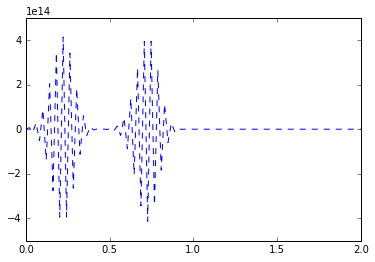

In [6]:
def FDT_FDS(u,x,dx,v,dt,t_end):
    t = 0.0
    u_new = np.ones_like(u)

    while (t < t_end):
        #Boundary conditions
        u_new[0] = 1
        u_new[-1] = 1
        #u_new[1] = u_new[-2]
        
        #Forward time and forward space difference
        u_new[1:-2] = u[1:-2] - v*(dt/dx)*(u[2:-1]-u[1:-2])
        u = u_new
        #Saving u_new - TO DO
        #Adding timestep
        t += dt
    return u

solution_FF = FDT_FDS(u,x,dx,v,dt,t_end)
print(solution_FF)

# Srovnani numerickeho a exaktniho reseni
plt.plot(x,solution_FF,'--')